In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
import pandas as pd

spectrum_train = pd.read_excel("spectrum_train.xlsx")
spectrum_test = pd.read_excel("spectrum_valid.xlsx")
temp_train = pd.read_excel("temp_train.xlsx")
temp_test = pd.read_excel("temp_valid.xlsx")

spectrum_train_scaled = spectrum_train.multiply(10**12)
spectrum_test_scaled = spectrum_test.multiply(10**12)

In [18]:
def get_list(df):
    column = []
    for i in range(0, len(df)):
        column.append(df.iloc[i].to_numpy())

    return column

In [19]:
spectrum_train_scaled["Array"] = get_list(spectrum_train_scaled)
spectrum_test_scaled["Array"] = get_list(spectrum_test_scaled)
temp_train["Array"] = get_list(temp_train)
temp_test["Array"] = get_list(temp_test)

In [20]:
temp_test["Array"][0]

array([410.76120097, 412.67879441, 409.4828717 , 401.94839317,
       398.92893219, 397.94839317, 401.34073607, 408.67879441,
       416.76120097, 421.62176524, 421.2542242 ])

In [21]:
spectrum_test_scaled.Array

0      [2.37353773674788, 2.60248135696764, 2.7758143...
1      [2.02741306595903, 2.1500296518271798, 2.25078...
2      [2.47059000840488, 2.72646284430028, 2.9212108...
3      [1.95027116459868, 2.04604094157617, 2.1313830...
4      [2.52352385993696, 2.7714089308945797, 2.95746...
                             ...                        
187    [2.1929342395334, 2.26501823413638, 2.34271987...
188    [2.8664435617199504, 3.11194997292307, 3.31016...
189    [2.47218887199998, 2.59533799234293, 2.7103515...
190    [2.9817176317352203, 3.2561560245688597, 3.477...
191    [2.38920735420284, 2.4794315217606098, 2.57557...
Name: Array, Length: 192, dtype: object

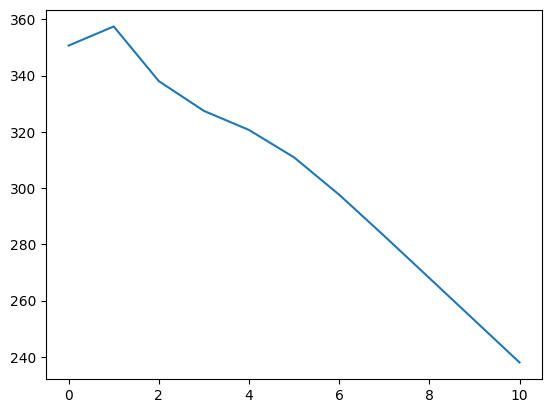

In [22]:
plt.plot(temp_train["Array"][0])

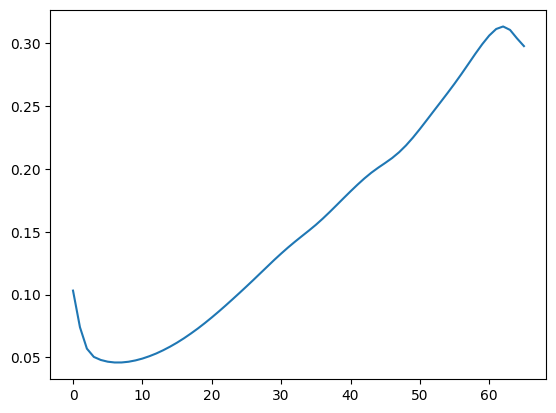

In [23]:
plt.plot(spectrum_train_scaled["Array"][5])

In [24]:
# 1 - temp to spectrum
# 0 - spectrum to temp
direction = 1

if direction:
    X_train = temp_train.Array
    X_test = temp_test.Array
    y_train = spectrum_train_scaled.Array
    y_test = spectrum_test_scaled.Array
else:
    X_train = spectrum_train_scaled.Array
    X_test = spectrum_test_scaled.Array
    y_train = temp_train.Array
    y_test = temp_test.Array

In [28]:
input_data = torch.Tensor(list(X_train.values))
output_data = torch.Tensor(list(y_train.values))

In [29]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

In [30]:
input_size = 1
output_size = 1
model = Net(input_size=input_size, output_size=output_size)

In [31]:
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Rprop(model.parameters(), lr=0.001) 

In [32]:
num_epochs = 15
batch_size = 5
num_batches = len(input_data) // batch_size

for epoch in range(num_epochs):
    for batch in range(num_batches):
        start = batch * batch_size
        end = start + batch_size

        inputs = input_data[start:end]
        targets = output_data[start:end]

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

    # Print the loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.6f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x11 and 1x128)